In [ ]:
'''
Alejandro Fernández Trigo
'''

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imagen = cv.imread('img/10_NorthCarolina.jpg',cv.IMREAD_GRAYSCALE)

In [3]:
# Función calculaMask: recibe la imagen y los valores digitales máximos/mínimos
def calculaMask(img, NDmin, NDmax):
    
    # Creamos una máscara con las dimensiones de la imagen de entrada:
    mask = np.zeros([img.shape[0], img.shape[1]], dtype=np.int16)
    
    # Recorrer la imagen, aplicamos la máscara sobre los valores digitales
    # que indica ND máximo/mínimo:
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # NDi,j = 1 si NDmin < imgi,j < NDmax
            if NDmax >= img[i,j] >= NDmin:
                mask[i,j] = 1
            # NDi,j = 0 en cualquier otro caso.   
            else:
                mask[i,j] = 0
    
    return mask

In [5]:
# Función máscara del ejercicio anterior:
def mascara(img, mask):

    # Recorrer filas/columnas; en las posiciones
    # a cero, hacer cero el resultado:
    resultado = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if mask[i][j] == 0:
                resultado[i][j] = 0
    
    return resultado

In [6]:
# Calcular máscaras sobre la imagen original: valores del enunciado, esto puede tardar un rato muuuuuy largo... (alrededor de 10 minutos)
mascara_luces = calculaMask(imagen, 200, 255)
mascara_nubes = calculaMask(imagen, 100, 180)

In [7]:
# Con la máscara de luces y nubes, las aplica sobre la imagen original (por separado): esto también tarda... (alrededor de 6 minutos)
enmascarado_luces = mascara(imagen, mascara_luces)
enmascarado_nubes = mascara(imagen, mascara_nubes)

Original


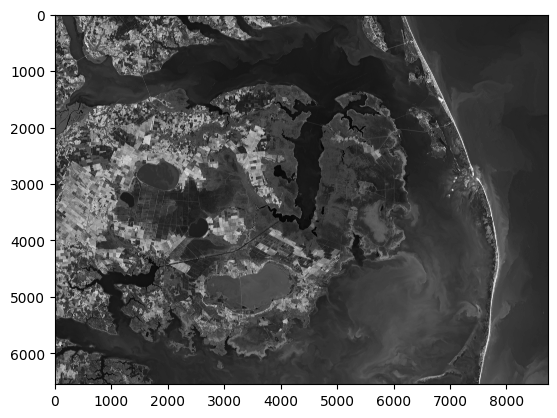

In [8]:
print("Original")
plt.imshow(imagen,cmap='gray')

Enmascarado luces


True

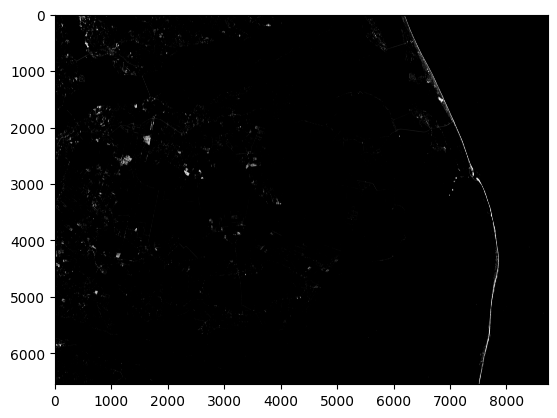

In [9]:
print("Enmascarado luces")
plt.imshow(enmascarado_luces,cmap='gray')
cv.imwrite("salida/Enmascarado_luces.png", enmascarado_luces)

Enmascarado nubes


True

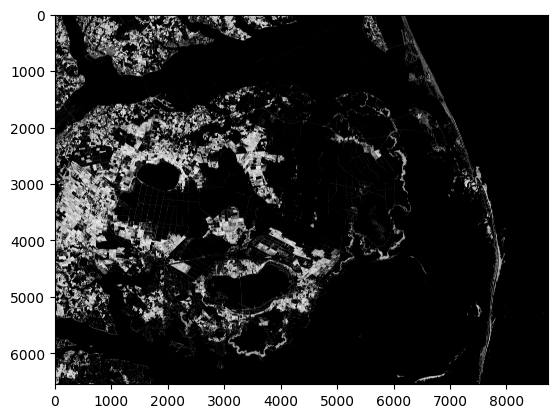

In [10]:
print("Enmascarado nubes")
plt.imshow(enmascarado_nubes,cmap='gray')
cv.imwrite("salida/Enmascarado_nubes.png", enmascarado_nubes)

In [15]:
# De forma adicional, hacemos lo mismo para otra imagen más adecuada donde las máscaras resaltan mejor los atributos que buscamos:
filomena = cv.imread('img/Filomena.jpg',cv.IMREAD_GRAYSCALE)

# Esto va a tardar también.... 
mascara_luces = calculaMask(filomena, 200, 255)
mascara_nubes = calculaMask(filomena, 100, 180)

enmascarado_luces_2 = mascara(filomena, mascara_luces)
enmascarado_nubes_2 = mascara(filomena, mascara_nubes)

Original


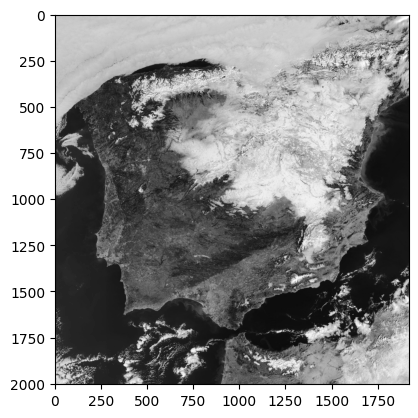

In [16]:
print("Original")
plt.imshow(filomena,cmap='gray')

Enmascarado luces Filomena


True

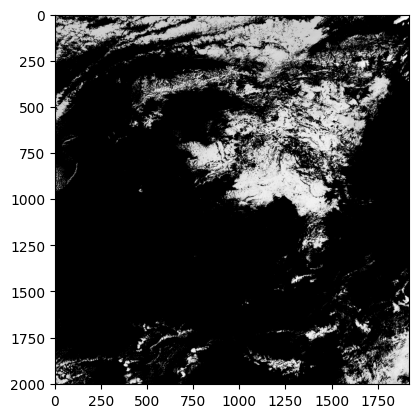

In [17]:
print("Enmascarado luces Filomena")
plt.imshow(enmascarado_luces_2,cmap='gray')
cv.imwrite("salida/Enmascarado_luces_2.png", enmascarado_luces_2)

Enmascarado nubes Filomena


True

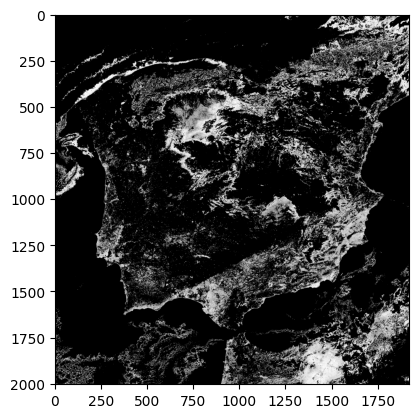

In [18]:
print("Enmascarado nubes Filomena")
plt.imshow(enmascarado_nubes_2,cmap='gray')
cv.imwrite("salida/Enmascarado_nubes_2.png", enmascarado_nubes_2)